<a href="https://colab.research.google.com/github/riskakurniaa/PCVK_Ganjil_2024/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

> **MODUL 10 - Thresholding, Segmentasi Sederhana**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

 Import folder yang ada di Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.  Import beberapa library

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170

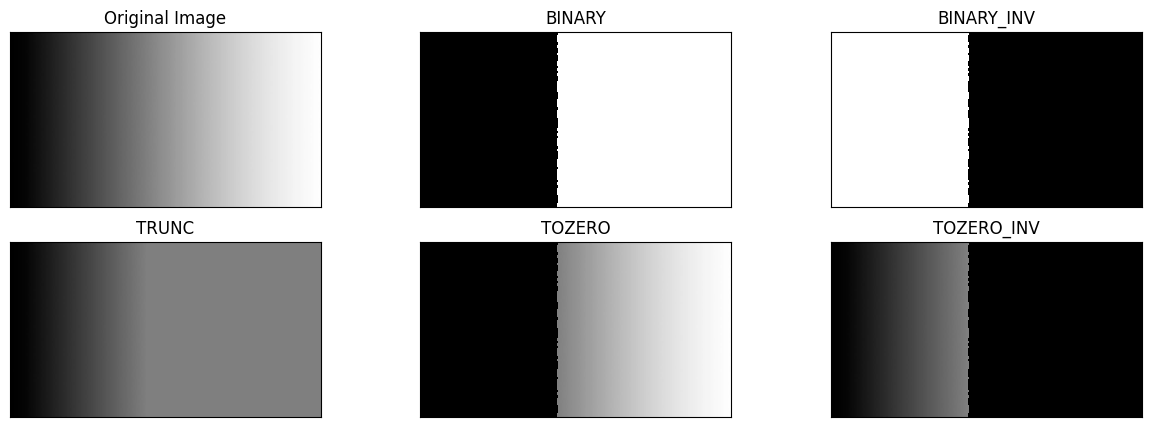

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s

<ipython-input-4-ba4877986ca9>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


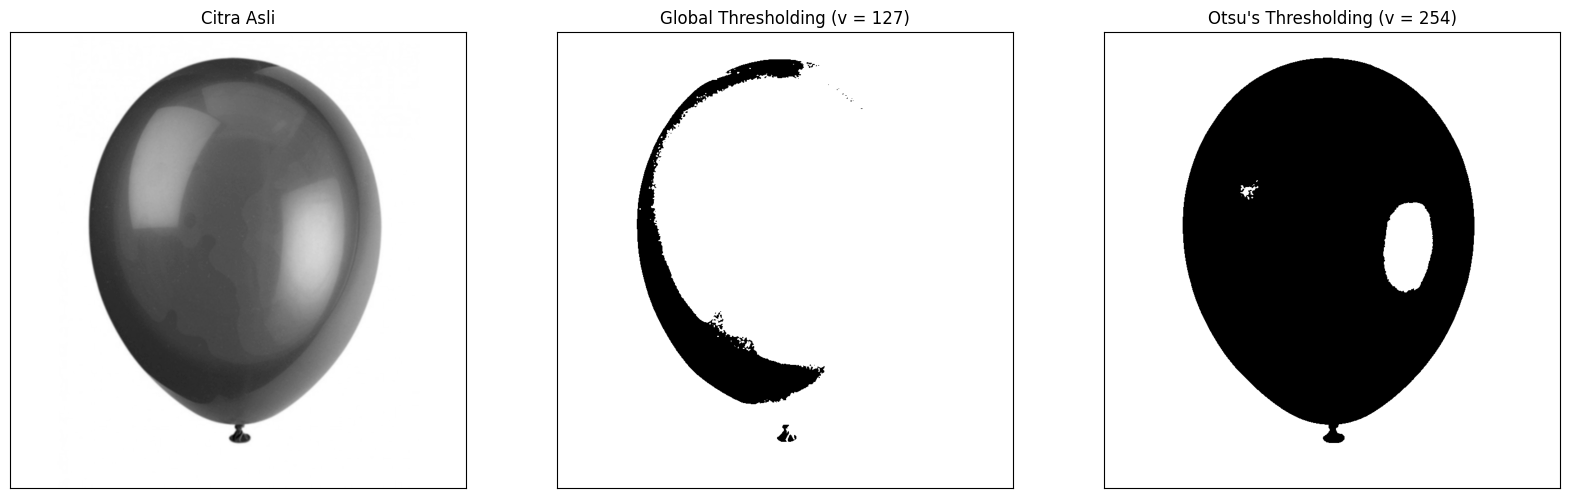

In [ ]:
dir = ('/content/drive/MyDrive/PCVK/balloon.jpg')

img = cv.imread(dir,0)
blur = cv. GaussianBlur (img, (5,5),0)

histogram = cv.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,255):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)  # Ubah 127 menjadi 90
ret, thresholdOtsu = cv.threshold(blur, 186, 255, cv.THRESH_BINARY)  # Ubah nilai threshold Otsu menjadi 186


names = ['Citra Asli', 'Global Thresholding (v = 127)', x]
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja.

Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

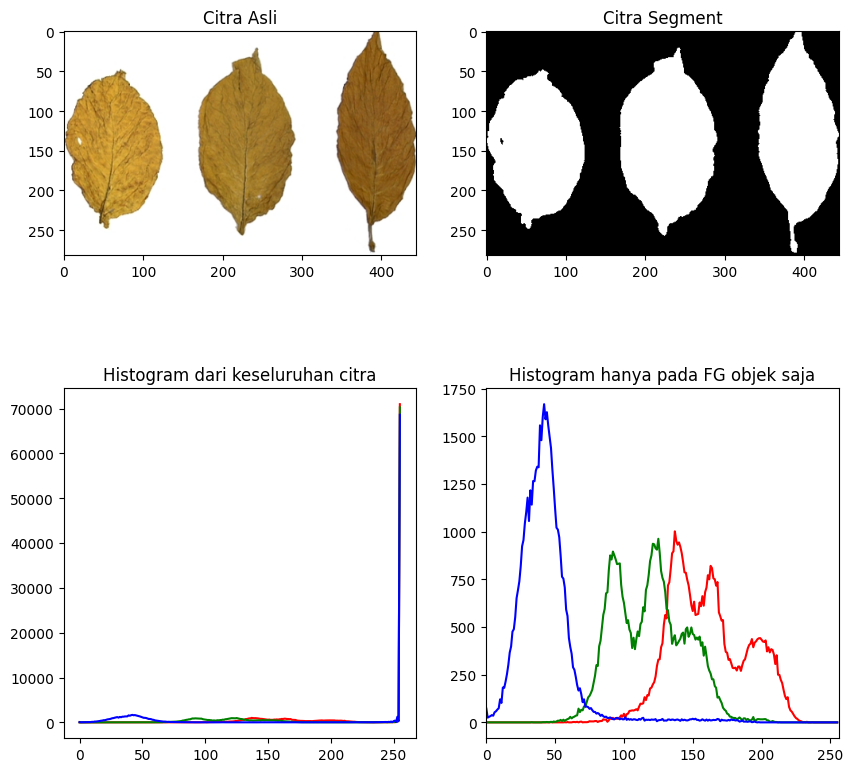

In [ ]:
dir = ('/content/drive/MyDrive/PCVK/tobacco.jpg')

img = cv.imread(dir)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    histogramSeluruhCitra = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col)
    plt.title('Histogram dari keseluruhan citra')
    histogramForeground = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja.

(<Axes: >, <matplotlib.image.AxesImage at 0x7b0245927dc0>)

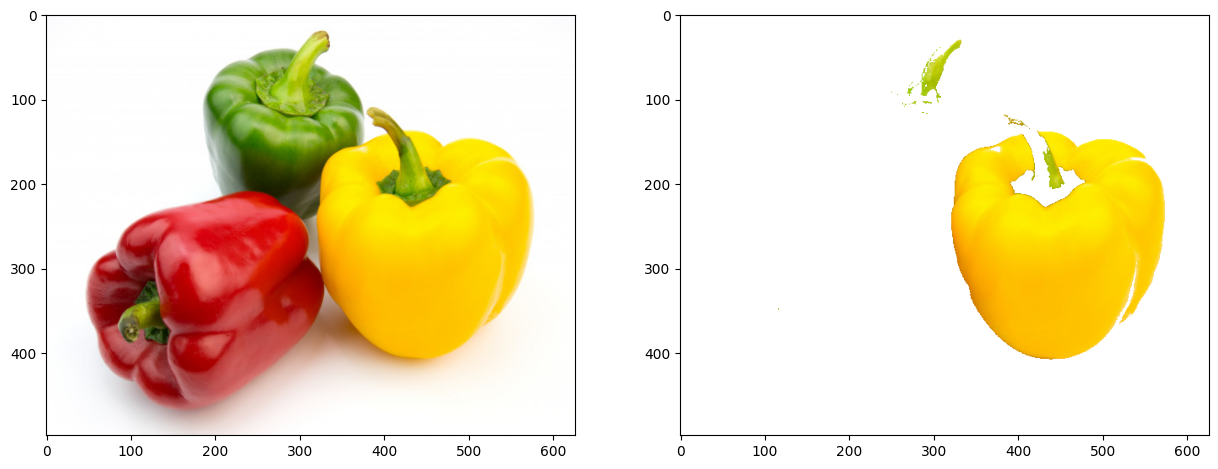

In [ ]:
dir = ('/content/drive/MyDrive/PCVK/peppers.jpg')
img = cv.imread(dir)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = np.copy(img)
segmented_image0= segmented_image.reshape((-1, 3))
segmented_image0[labels != 1] = [255, 255, 255]
segmented_image0 = segmented_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image0)

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

**Jawab:**


Jadi, ketika melakukan segmentasi warna menggunakan K-Means untuk menampilkan warna kuning pada gambar, kendala yang dihadapi yaitu kesulitan memisahkan warna yang mirip, karena K-Means mengelompokkan piksel berdasarkan kedekatan warna di ruang RGB, di mana nuansa warna kuning bisa bercampur dengan warna lain seperti merah atau hijau. Selain itu, pemilihan jumlah cluster (k) yang tidak tepat bisa menyebabkan warna kuning tergabung dengan warna lain atau terlalu terpecah. Variasi pencahayaan pada gambar juga mempengaruhi hasil segmentasi, karena intensitas warna berubah.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

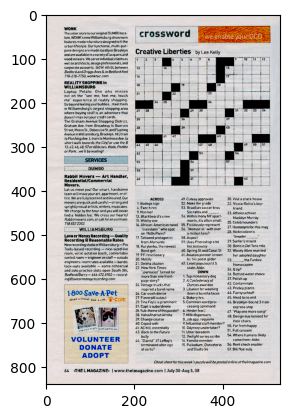

In [ ]:
img_c = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg')
img_rgb3 = cv.cvtColor(img_c, cv.COLOR_BGR2RGB)

ret, thresh = cv.threshold(img_rgb3, 125, 255, cv.THRESH_TOZERO)

plt.imshow(thresh)
cv.waitKey(0)
cv.destroyAllWindows()